In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [8]:
open_air = pd.read_csv('open_air.csv')
acrylic_glass = pd.read_csv('acrylic_glass.csv')
wood = pd.read_csv('wood.csv')

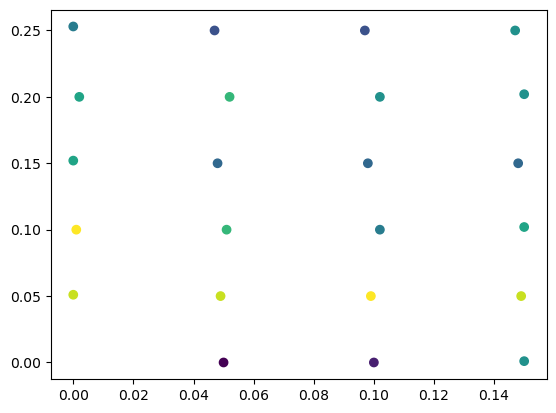

In [39]:
plt.scatter(wood['x_m'], wood['y_m'], c=wood["RSSI"], cmap='viridis', label='Wood', alpha=1)

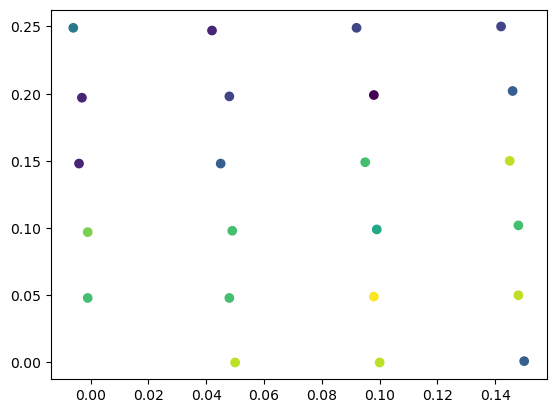

In [41]:
plt.scatter(acrylic_glass['x_m'], acrylic_glass['y_m'], c=acrylic_glass["RSSI"], cmap='viridis', label='Glass', alpha=1)

In [9]:
from scipy import stats

# Example data
air = open_air['RSSI'].tolist()
wood_list = wood['RSSI'].tolist()
glass = acrylic_glass['RSSI'].tolist()

# One-way ANOVA
f_stat, p_val = stats.f_oneway(air, wood_list, glass)
print(f"F={f_stat:.2f}, p={p_val:.4f}")

F=4.55, p=0.0141


In [63]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine lists into one long DataFrame
rssi_values = air + wood_list + glass
materials = (['air'] * len(air)) + (['wood'] * len(wood_list)) + (['acrylic'] * len(glass))

df = pd.DataFrame({
    'RSSI': rssi_values,
    'Material': materials
})

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(
    endog=df['RSSI'],         # dependent variable
    groups=df['Material'],    # independent groups
    alpha=0.05
)

print(tukey.summary())


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
acrylic    air   2.1739 0.0803 -0.2059  4.5538  False
acrylic   wood  -0.6957 0.7638 -3.0755  1.6842  False
    air   wood  -2.8696 0.0142 -5.2494 -0.4897   True
-----------------------------------------------------


Estimated Source Position: (0.06, 0.23)


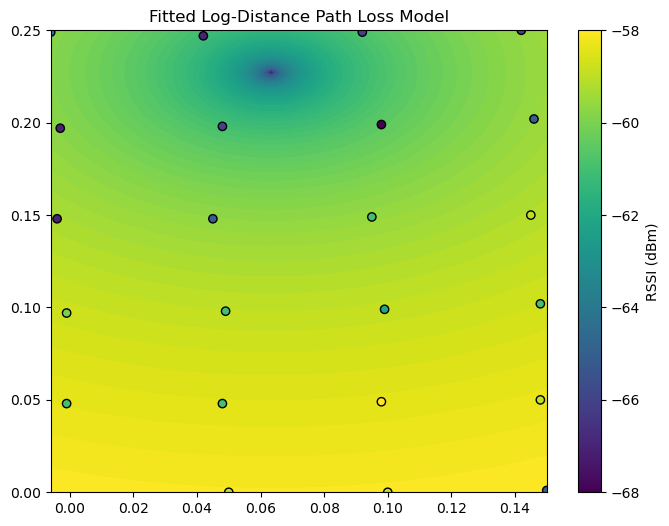

In [60]:
import numpy as np 
from scipy.optimize import least_squares

x = acrylic_glass["x_m"].values
y = acrylic_glass["y_m"].values
rssi = acrylic_glass["RSSI"].values

XY = np.column_stack((x,y))

def path_loss_model(params, XY, rssi):
    xs, yx, P0, n = params
    x, y = XY[:,0], XY[:,1]
    d = np.sqrt((x - xs)**2 + (y - yx)**2)
    d[d < 1e-6] = 1e-6  # avoid log(0)
    pred = P0 - 10 * n * np.log10(d)
    return pred - rssi

def predict_rssi(x, y, xs, ys, P0, n):
    d = np.sqrt((x - xs)**2 + (y - ys)**2)
    d[d < 1e-6] = 1e-6  # avoid log(0)
    return P0 - 10 * n * np.log10(d) 


# Initial guess: (x, y, P0, n)
initial_guess = (np.mean(x), np.mean(y), -0.15, 0.15)

# Fit with least squares
res = least_squares(path_loss_model, initial_guess, args=(XY, rssi))

xs_est, ys_est, P0_est, n_est = res.x
print(f"Estimated Source Position: ({xs_est:.2f}, {ys_est:.2f})")


xi = np.linspace(XY[:,0].min(), XY[:,0].max(), 100)
yi = np.linspace(XY[:,1].min(), XY[:,1].max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = predict_rssi(xi, yi, xs_est, ys_est, P0_est, n_est)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.contourf(xi, yi, zi, levels=100, cmap='viridis')
plt.scatter(XY[:,0], XY[:,1], c=rssi, cmap='viridis', edgecolor='k')
plt.colorbar(label="RSSI (dBm)")
plt.title("Fitted Log-Distance Path Loss Model")
plt.show()


Estimated Source Position: (13.33, 10.26)


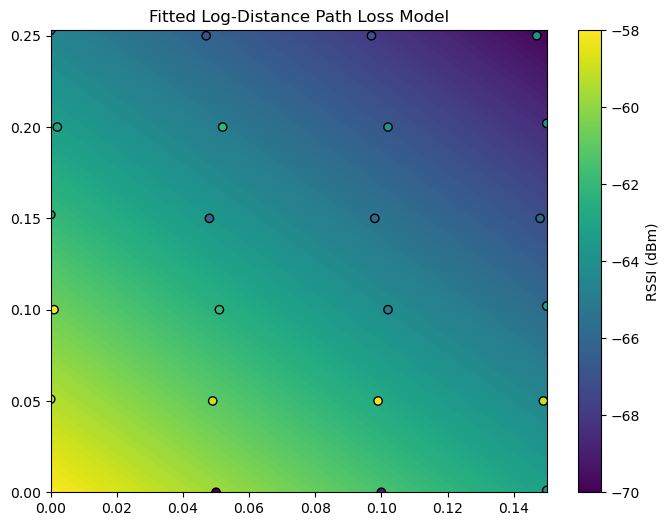

In [62]:
import numpy as np 
from scipy.optimize import least_squares

x = wood["x_m"].values
y = wood["y_m"].values
rssi = wood["RSSI"].values

XY = np.column_stack((x,y))

def path_loss_model(params, XY, rssi):
    xs, yx, P0, n = params
    x, y = XY[:,0], XY[:,1]
    d = np.sqrt((x - xs)**2 + (y - yx)**2)
    d[d < 1e-6] = 1e-6  # avoid log(0)
    pred = P0 - 10 * n * np.log10(d)
    return pred - rssi

def predict_rssi(x, y, xs, ys, P0, n):
    d = np.sqrt((x - xs)**2 + (y - ys)**2)
    d[d < 1e-6] = 1e-6  # avoid log(0)
    return P0 - 10 * n * np.log10(d) 


# Initial guess: (x, y, P0, n)
initial_guess = (np.mean(x), np.mean(y), -0.15, 0.15)

# Fit with least squares
res = least_squares(path_loss_model, initial_guess, args=(XY, rssi))

xs_est, ys_est, P0_est, n_est = res.x
print(f"Estimated Source Position: ({xs_est:.2f}, {ys_est:.2f})")


xi = np.linspace(XY[:,0].min(), XY[:,0].max(), 100)
yi = np.linspace(XY[:,1].min(), XY[:,1].max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = predict_rssi(xi, yi, xs_est, ys_est, P0_est, n_est)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.contourf(xi, yi, zi, levels=100, cmap='viridis')
plt.scatter(XY[:,0], XY[:,1], c=rssi, cmap='viridis', edgecolor='k')
plt.colorbar(label="RSSI (dBm)")
plt.title("Fitted Log-Distance Path Loss Model")
plt.show()


Estimated Source Position: (0.05, 0.25)


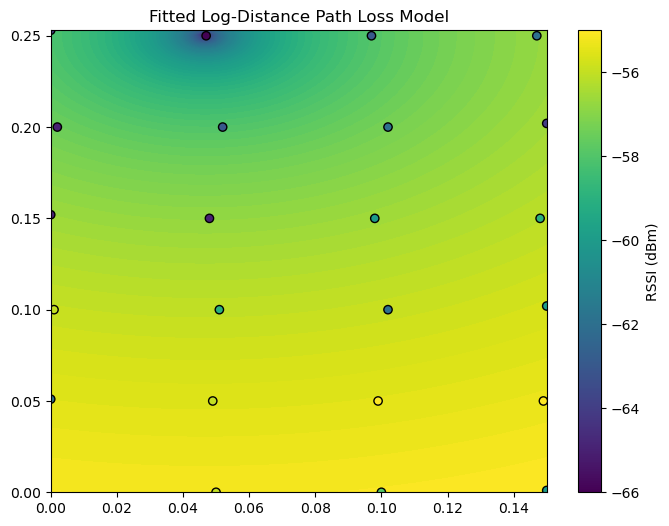

In [64]:
import numpy as np 
from scipy.optimize import least_squares

x = open_air["x_m"].values
y = open_air["y_m"].values
rssi = open_air["RSSI"].values

XY = np.column_stack((x,y))

def path_loss_model(params, XY, rssi):
    xs, yx, P0, n = params
    x, y = XY[:,0], XY[:,1]
    d = np.sqrt((x - xs)**2 + (y - yx)**2)
    d[d < 1e-6] = 1e-6  # avoid log(0)
    pred = P0 - 10 * n * np.log10(d)
    return pred - rssi

def predict_rssi(x, y, xs, ys, P0, n):
    d = np.sqrt((x - xs)**2 + (y - ys)**2)
    d[d < 1e-6] = 1e-6  # avoid log(0)
    return P0 - 10 * n * np.log10(d) 


# Initial guess: (x, y, P0, n)
initial_guess = (np.mean(x), np.mean(y), -0.15, 0.15)

# Fit with least squares
res = least_squares(path_loss_model, initial_guess, args=(XY, rssi))

xs_est, ys_est, P0_est, n_est = res.x
print(f"Estimated Source Position: ({xs_est:.2f}, {ys_est:.2f})")


xi = np.linspace(XY[:,0].min(), XY[:,0].max(), 100)
yi = np.linspace(XY[:,1].min(), XY[:,1].max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = predict_rssi(xi, yi, xs_est, ys_est, P0_est, n_est)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.contourf(xi, yi, zi, levels=100, cmap='viridis')
plt.scatter(XY[:,0], XY[:,1], c=rssi, cmap='viridis', edgecolor='k')
plt.colorbar(label="RSSI (dBm)")
plt.title("Fitted Log-Distance Path Loss Model")
plt.show()
